In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
train = pd.read_csv('train (1).csv')
test = pd.read_csv('test (1).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


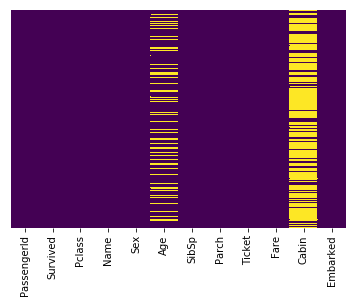

In [151]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

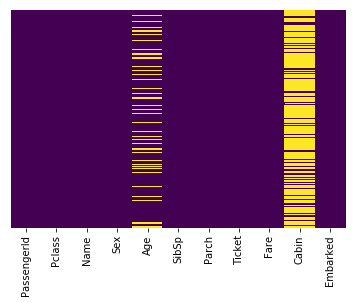

In [152]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [154]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


C:\Users\possibility\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


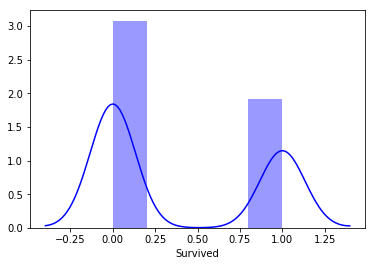

In [155]:
sns.distplot(train['Survived'],color='blue')

In [156]:
num_feature = train.select_dtypes(include=[np.number])
num_feature.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [157]:
correlation = train.corr()
print(correlation['Survived'].sort_values(ascending=False)[:], '\n')
print(correlation['Survived'].sort_values(ascending=False)[:])

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64 

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


Text(0,0.5,'Survived')

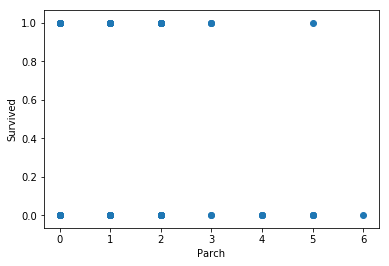

In [158]:
plt.scatter(x=train['Parch'],y=train['Survived'])
plt.xlabel('Parch')
plt.ylabel('Survived')

Text(0,0.5,'Survived')

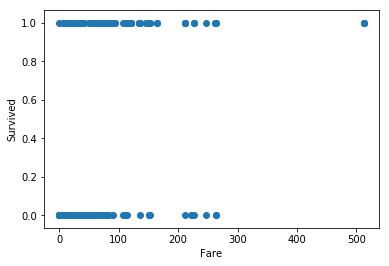

In [159]:
plt.scatter(x=train['Fare'],y=train['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

C:\Users\possibility\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


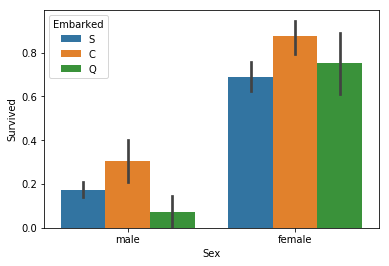

In [160]:
sns.barplot(x='Sex',y='Survived',data=train,hue='Embarked')

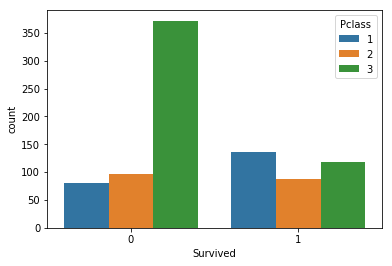

In [161]:
sns.countplot(x='Survived',data=train,hue='Pclass')

In [162]:
catergorical = train.select_dtypes(exclude=[np.number])
catergorical.dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

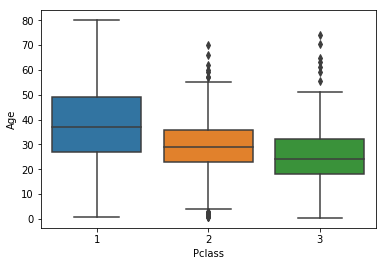

In [163]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [164]:
def impute_age(cols):
    Age=cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 39
        elif Pclass ==2:
            
            return 29
        else:
            return 24
    else:
        return Age

In [165]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [166]:
test['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

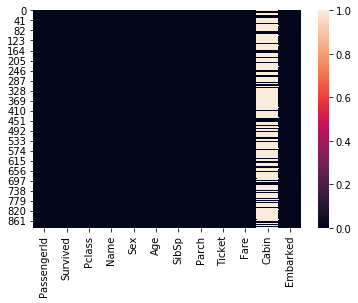

In [167]:
sns.heatmap(train.isnull())

In [168]:
train.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
test.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [169]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [170]:
#encoding both the train and test data
train['enc_sex']=pd.get_dummies(train['Sex'],drop_first=True,)
test['enc_sex']=pd.get_dummies(test['Sex'],drop_first=True)
print('encoded:  \n')
print('train.enc_sex: \n',train.enc_sex.value_counts())
print('test.enc_sex: \n',test.enc_sex.value_counts())

encoded:  

train.enc_sex: 
 1    577
0    314
Name: enc_sex, dtype: int64
test.enc_sex: 
 1    266
0    152
Name: enc_sex, dtype: int64


In [171]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'enc_sex'],
      dtype='object')

In [172]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
train_data=pd.concat([train,embark],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enc_sex,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [173]:
embark=pd.get_dummies(test['Embarked'],drop_first=True)
test_data=pd.concat([test,embark],axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enc_sex,Q,S
0,892,3,male,22.0,0,0,7.8292,Q,1,1,0
1,893,3,female,38.0,1,0,7.0000,S,0,0,1
2,894,2,male,26.0,0,0,9.6875,Q,1,1,0
3,895,3,male,35.0,0,0,8.6625,S,1,0,1
4,896,3,female,35.0,1,1,12.2875,S,0,0,1


In [174]:
train_data.drop(['Sex','Embarked','PassengerId'],inplace=True,axis=1)
test_data.drop(['Sex','Embarked'],inplace=True,axis=1)

In [175]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,enc_sex,Q,S
0,892,3,22.0,0,0,7.8292,1,1,0
1,893,3,38.0,1,0,7.0000,0,0,1
2,894,2,26.0,0,0,9.6875,1,1,0
3,895,3,35.0,0,0,8.6625,1,0,1
4,896,3,35.0,1,1,12.2875,0,0,1


In [176]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,enc_sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [177]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [178]:
y=train_data.iloc[:,0].values
x=train_data.iloc[:,1:].values
x

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 24.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [181]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
regressor= LogisticRegression()

In [184]:
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [185]:
y_pred=regressor.predict(x_test)

In [186]:
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score

In [187]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84       159
          1       0.79      0.67      0.73       109

avg / total       0.79      0.79      0.79       268



In [188]:
confusion_matrix(y_test,y_pred)

array([[140,  19],
       [ 36,  73]], dtype=int64)

In [189]:
accuracy_score(y_test,y_pred)

0.7947761194029851

In [190]:
test_dat = test_data.select_dtypes(include=[np.number]).interpolate().dropna()
sum(test_dat.isnull().sum() != 0)

0

In [191]:
test_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
enc_sex        418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.1 KB


In [192]:
submission= pd.DataFrame()
submission['PassengerId'] = test_dat.PassengerId
test_dat = test_dat.select_dtypes(include=[np.number]).drop(['PassengerId'], axis=1).interpolate()
prediction = regressor.predict(test_dat)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
parameters=[{'C':np.logspace(0,4,10),'penalty':['l1','l2']}]

In [195]:
grid= GridSearchCV(estimator=regressor,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)

In [196]:
grid = grid.fit(x_train,y_train)

In [197]:
grid

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [198]:
best_estimator = grid.best_estimator_
best_estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
best_score = grid.best_score_
best_score

0.8089887640449438

In [200]:
best_para=grid.best_params_
best_para

{'C': 1.0, 'penalty': 'l2'}

In [201]:
regressor=LogisticRegression(C=1.0,penalty='l2')

In [202]:
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [203]:
pred=regressor.predict(x_test)

In [204]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84       159
          1       0.79      0.67      0.73       109

avg / total       0.79      0.79      0.79       268



In [205]:
test_dat = test_data.select_dtypes(include=[np.number]).interpolate().dropna()
sum(test_dat.isnull().sum() != 0)

0

In [206]:
submission= pd.DataFrame()
submission['PassengerId'] = test_dat.PassengerId
test_dat = test_dat.select_dtypes(include=[np.number]).drop(['PassengerId'], axis=1).interpolate()
prediction = regressor.predict(test_dat)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [207]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [208]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [209]:
pred=classifier.predict(x_test)

In [210]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.81      0.81       159
          1       0.72      0.72      0.72       109

avg / total       0.77      0.77      0.77       268



In [211]:
from sklearn.model_selection import GridSearchCV

In [221]:
parameter=[{'criterion':['gini','entropy'],'min_impurity_split':list(range(1,50)),'max_depth':np.arange(3,5)}]

In [222]:
grid= GridSearchCV(estimator=classifier,param_grid=parameter,scoring='accuracy',cv=10,n_jobs=-1)

In [223]:
grid.fit(x_train,y_train)

C:\Users\possibility\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'min_impurity_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'max_depth': array([3, 4])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [224]:
best_estimator = grid.best_estimator_
best_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [225]:
best_score = grid.best_score_
best_score

0.6260032102728732